In [1]:
import pandas as pd


In [2]:
df=pd.read_csv('Titanic.csv',usecols=['Age','Survived','Fare'])

In [3]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


### Arbitrary imputation

###### It consist of replacing NAN value with arbitary value

In [4]:
def imputing_NAN(df,variable):
    df[variable+'_hundred']=df[variable].fillna(100)
    df[variable+'_zero']=df[variable].fillna(0)

<AxesSubplot:>

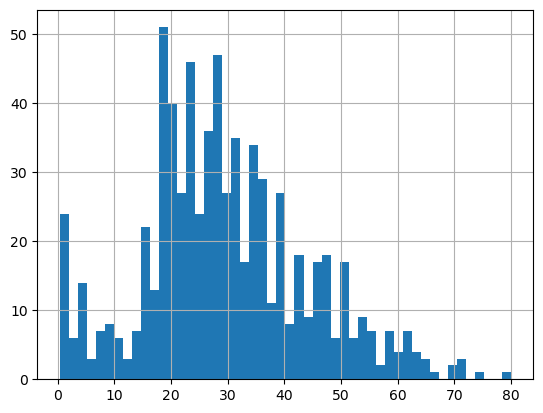

In [5]:
df['Age'].hist(bins=50)

## Advantages
1.Easy to implement
2.Captures the importance of missingess if there is one
## Disadvantages
1.Distorts the original distribution of the variable
2.If missingess is not important, it may mask the predictive power of the original variable by distorting its distribution
Hard to decide which value to use

## How to handle categorical missing values

## Frequent Categorical imputation

In [6]:
df=pd.read_csv('train.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [7]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [8]:
df.columns

Index(['BsmtQual', 'FireplaceQu', 'GarageType', 'SalePrice'], dtype='object')

In [9]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [10]:
df.isnull().mean().sort_values(ascending=True)

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

## Compute the frequency with every feature

<AxesSubplot:xlabel='BsmtQual'>

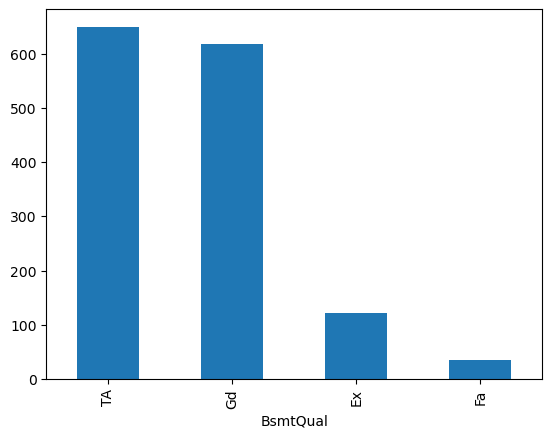

In [11]:
df.groupby(['BsmtQual'])['BsmtQual'].count().sort_values(ascending=False).plot.bar()

<AxesSubplot:>

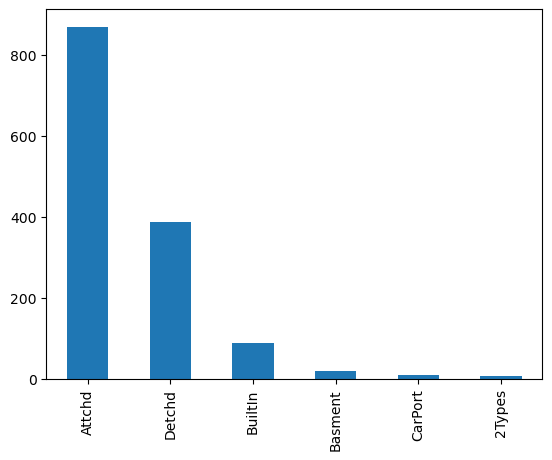

In [12]:
df['GarageType'].value_counts().plot.bar()

<AxesSubplot:>

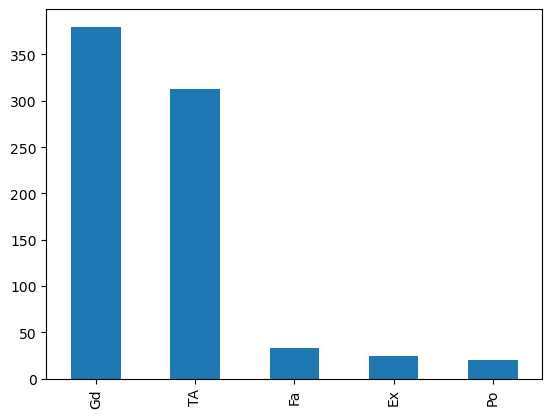

In [13]:
df['FireplaceQu'].value_counts().plot.bar()

In [14]:
df['GarageType'].value_counts().index[0]

'Attchd'

In [15]:
def impute_NAN(df,variable):
    most_frequently_category=df[variable].value_counts().index[0]
    df[variable].fillna(most_frequently_category,inplace=True)

In [16]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_NAN(df,feature)

In [17]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,Gd,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [24]:
import numpy as np

In [25]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
dtype: int64

## Advantage
1. easy to implement
2. faster way to implement

## Disadvantage
1. Since we are using more frequent labels, it may use them in an over represented way if there are many NAN'S
2. It distorts the relationship of most frequent labels

## Addding variable to capture NAN values

In [21]:
df=pd.read_csv("train.csv",usecols=['BsmtQual','FireplaceQu','GarageType'])

In [22]:
df.head()

,BsmtQual,FireplaceQu,GarageType
0,Gd,NaN,Attchd
1,Gd,TA,Attchd
2,Gd,TA,Attchd
3,TA,Gd,Detchd
4,Gd,TA,Attchd


In [26]:
df['BsmtQual_var']=np.where(df['BsmtQual'].isnull(),1,0)

In [27]:
df.head()

,BsmtQual,FireplaceQu,GarageType,BsmtQual_var
0,Gd,NaN,Attchd,0
1,Gd,TA,Attchd,0
2,Gd,TA,Attchd,0
3,TA,Gd,Detchd,0
4,Gd,TA,Attchd,0


In [30]:
frequent=df['BsmtQual'].mode()[0]

In [32]:
df['BsmtQual'].fillna(frequent,inplace=True)

In [33]:
df.head()

,BsmtQual,FireplaceQu,GarageType,BsmtQual_var
0,Gd,NaN,Attchd,0
1,Gd,TA,Attchd,0
2,Gd,TA,Attchd,0
3,TA,Gd,Detchd,0
4,Gd,TA,Attchd,0


In [34]:
df['FireplaceQu_var']=np.where(df['FireplaceQu'].isnull(),1,0)

In [36]:
frequent=df['FireplaceQu'].mode()[0]

In [37]:
df['FireplaceQu'].fillna(frequent,inplace=True)

In [38]:
df.head()

,BsmtQual,FireplaceQu,GarageType,BsmtQual_var,FireplaceQu_var
0,Gd,Gd,Attchd,0,1
1,Gd,TA,Attchd,0,0
2,Gd,TA,Attchd,0,0
3,TA,Gd,Detchd,0,0
4,Gd,TA,Attchd,0,0


## Supppse if we have more frequent category, we replace NAN with a new category

In [42]:
df=pd.read_csv('train.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [43]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [47]:
def impute_nan(df,variable):
    df[variable+"newvar"]=np.where(df[variable].isnull(),"Missing",df[variable])

In [48]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,feature)

In [49]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQualnewvar,FireplaceQunewvar,GarageTypenewvar
0,Gd,NaN,Attchd,208500,Gd,Missing,Attchd
1,Gd,TA,Attchd,181500,Gd,TA,Attchd
2,Gd,TA,Attchd,223500,Gd,TA,Attchd
3,TA,Gd,Detchd,140000,TA,Gd,Detchd
4,Gd,TA,Attchd,250000,Gd,TA,Attchd


In [51]:
df=df.drop(columns=['BsmtQual','FireplaceQu','GarageType'])

In [52]:
df.head()

,SalePrice,BsmtQualnewvar,FireplaceQunewvar,GarageTypenewvar
0,208500,Gd,Missing,Attchd
1,181500,Gd,TA,Attchd
2,223500,Gd,TA,Attchd
3,140000,TA,Gd,Detchd
4,250000,Gd,TA,Attchd
